In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Train = pd.read_csv("DataSets/Train.csv")

In [3]:
Train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
data = {'traffic_volume':Train['traffic_volume'], 'date_time':Train['date_time']}
target = pd.DataFrame(data).set_index('date_time')
Train.drop(columns =["traffic_volume"], inplace = True)

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(target[:200])
plt.show()

<Figure size 1500x500 with 1 Axes>

In [6]:
def preProcessingScript(dataFrame):
    import pickle
    dataFrame['is_holiday'] = np.where(dataFrame['is_holiday'] == "None", "Working Day", dataFrame['is_holiday'])
    dateTimeSplits = dataFrame["date_time"].str.split(" ")
    dataFrame["Year"] = pd.DataFrame([ item[0].split("-")[0] for item in dateTimeSplits ])
    dataFrame["Month"] = pd.DataFrame([ item[0].split("-")[1] for item in dateTimeSplits ])
    dataFrame["Day"] = pd.DataFrame([ item[0].split("-")[2] for item in dateTimeSplits ])
    dataFrame["hour"] = pd.DataFrame([ item[1].split(":")[0] for item in dateTimeSplits ])
    dataFrame.drop(columns =["date_time"], inplace = True)
    mapper_fit = pickle.load(open('fitted_mapper.pkl', 'rb'))
    return mapper_fit.transform(dataFrame)

# Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation, Flatten, TimeDistributed, AveragePooling1D
from tensorflow.keras.callbacks import TensorBoard
import time

def baseline_model():
    model = Sequential()
    model.add(Dense(460, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(416, kernel_initializer='normal', activation='relu'))
    model.add(Dense(410, kernel_initializer='normal', activation='relu'))
    model.add(Dense(386, kernel_initializer='normal', activation='relu'))
    model.add(Dense(316, kernel_initializer='normal', activation='relu'))
    model.add(Dense(216, kernel_initializer='normal', activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(160, kernel_initializer='normal', activation='relu'))
    model.add(Dense(154, kernel_initializer='normal', activation='relu'))
    model.add(Dense(145, kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(54, kernel_initializer='normal', activation='relu'))
    model.add(Dense(45, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model

In [8]:
model = baseline_model()

W0804 15:55:42.042356 14604 deprecation.py:506] From c:\users\chira\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 460)               8280      
_________________________________________________________________
dense_1 (Dense)              (None, 416)               191776    
_________________________________________________________________
dense_2 (Dense)              (None, 410)               170970    
_________________________________________________________________
dense_3 (Dense)              (None, 386)               158646    
_________________________________________________________________
dense_4 (Dense)              (None, 316)               122292    
_________________________________________________________________
dense_5 (Dense)              (None, 216)               68472     
_________________________________________________________________
flatten (Flatten)            (None, 216)               0

In [10]:
dataForT = preProcessingScript(Train)
targetForT = target

In [11]:
dataForT.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,Year,Month,Day,hour
0,11,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24,-1.678399,0.818182,0.033333,0.391304
1,11,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2,-1.678399,0.818182,0.033333,0.434783
2,11,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19,-1.678399,0.818182,0.033333,0.478261
3,11,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19,-1.678399,0.818182,0.033333,0.521739
4,11,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2,-1.678399,0.818182,0.033333,0.565217


# Execute from here

In [59]:
fieTime = int(time.time())
NAME = "Traffic-{}".format(fieTime)
modelFilename = "Train3\DLModel-{}.h5".format(fieTime)
LRfilename = "Train3\LRModel{}.pkl".format(fieTime)
outfilename = "Train3\Prediction{}.csv".format(fieTime)

In [60]:
tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))
fM= model.fit(dataForT, targetForT, epochs=1000, batch_size=1000, validation_split=0.01, verbose=2,callbacks=[tensorboard] )

Train on 33412 samples, validate on 338 samples
Epoch 1/1000
33412/33412 - 1s - loss: 51468.9638 - val_loss: 2096546.5000
Epoch 2/1000
33412/33412 - 1s - loss: 51398.6958 - val_loss: 2081462.8750
Epoch 3/1000
33412/33412 - 1s - loss: 54085.3664 - val_loss: 2257954.7500
Epoch 4/1000
33412/33412 - 1s - loss: 53257.2531 - val_loss: 2060879.3750
Epoch 5/1000
33412/33412 - 1s - loss: 60222.9139 - val_loss: 2050932.6250
Epoch 6/1000
33412/33412 - 1s - loss: 56906.6341 - val_loss: 2190894.5000
Epoch 7/1000
33412/33412 - 1s - loss: 61848.7551 - val_loss: 2171192.5000
Epoch 8/1000
33412/33412 - 1s - loss: 60433.2052 - val_loss: 2086892.8750
Epoch 9/1000
33412/33412 - 1s - loss: 52700.1806 - val_loss: 1970489.7500
Epoch 10/1000
33412/33412 - 1s - loss: 59727.7859 - val_loss: 2216057.5000
Epoch 11/1000
33412/33412 - 1s - loss: 53198.9708 - val_loss: 1858309.2500
Epoch 12/1000
33412/33412 - 2s - loss: 55005.1773 - val_loss: 2037927.7500
Epoch 13/1000
33412/33412 - 2s - loss: 59163.1997 - val_loss:

Epoch 110/1000
33412/33412 - 2s - loss: 45358.5198 - val_loss: 2308408.2500
Epoch 111/1000
33412/33412 - 2s - loss: 52757.6681 - val_loss: 2130980.0000
Epoch 112/1000
33412/33412 - 2s - loss: 51477.8570 - val_loss: 2219002.0000
Epoch 113/1000
33412/33412 - 2s - loss: 46752.6591 - val_loss: 2208315.0000
Epoch 114/1000
33412/33412 - 2s - loss: 48435.2948 - val_loss: 2071698.3750
Epoch 115/1000
33412/33412 - 2s - loss: 58661.3600 - val_loss: 2272935.7500
Epoch 116/1000
33412/33412 - 2s - loss: 39560.8074 - val_loss: 2226019.5000
Epoch 117/1000
33412/33412 - 2s - loss: 61399.6500 - val_loss: 2210640.5000
Epoch 118/1000
33412/33412 - 2s - loss: 49126.0364 - val_loss: 2168945.5000
Epoch 119/1000
33412/33412 - 2s - loss: 44006.6255 - val_loss: 2470254.5000
Epoch 120/1000
33412/33412 - 2s - loss: 43310.6863 - val_loss: 2076057.7500
Epoch 121/1000
33412/33412 - 2s - loss: 63333.9934 - val_loss: 2237452.7500
Epoch 122/1000
33412/33412 - 2s - loss: 42826.0106 - val_loss: 2041167.8750
Epoch 123/10

Epoch 218/1000
33412/33412 - 2s - loss: 42521.8391 - val_loss: 2689287.5000
Epoch 219/1000
33412/33412 - 2s - loss: 46411.4256 - val_loss: 2473931.0000
Epoch 220/1000
33412/33412 - 2s - loss: 49280.3790 - val_loss: 2668066.7500
Epoch 221/1000
33412/33412 - 2s - loss: 48812.7699 - val_loss: 2584148.2500
Epoch 222/1000
33412/33412 - 2s - loss: 38577.1990 - val_loss: 2629723.0000
Epoch 223/1000
33412/33412 - 2s - loss: 45590.8512 - val_loss: 2567300.5000
Epoch 224/1000
33412/33412 - 2s - loss: 46980.9475 - val_loss: 2174388.0000
Epoch 225/1000
33412/33412 - 2s - loss: 50318.9260 - val_loss: 2332005.7500
Epoch 226/1000
33412/33412 - 2s - loss: 32231.9490 - val_loss: 2203865.7500
Epoch 227/1000
33412/33412 - 2s - loss: 48113.1485 - val_loss: 2299554.0000
Epoch 228/1000
33412/33412 - 2s - loss: 54839.3765 - val_loss: 2055525.8750
Epoch 229/1000
33412/33412 - 2s - loss: 47447.4335 - val_loss: 2400496.7500
Epoch 230/1000
33412/33412 - 2s - loss: 32365.9858 - val_loss: 2254256.2500
Epoch 231/10

Epoch 326/1000
33412/33412 - 2s - loss: 34500.9544 - val_loss: 2601801.2500
Epoch 327/1000
33412/33412 - 2s - loss: 45417.7317 - val_loss: 2620501.0000
Epoch 328/1000
33412/33412 - 2s - loss: 47328.3817 - val_loss: 2568242.0000
Epoch 329/1000
33412/33412 - 2s - loss: 31212.1570 - val_loss: 2406044.0000
Epoch 330/1000
33412/33412 - 2s - loss: 49101.1646 - val_loss: 2362928.7500
Epoch 331/1000
33412/33412 - 2s - loss: 46992.2836 - val_loss: 2218971.0000
Epoch 332/1000
33412/33412 - 2s - loss: 42239.1369 - val_loss: 2588814.0000
Epoch 333/1000
33412/33412 - 2s - loss: 43274.2435 - val_loss: 2535877.2500
Epoch 334/1000
33412/33412 - 2s - loss: 39015.9858 - val_loss: 2526135.7500
Epoch 335/1000
33412/33412 - 2s - loss: 37518.7851 - val_loss: 2445132.2500
Epoch 336/1000
33412/33412 - 2s - loss: 46303.5434 - val_loss: 2498021.0000
Epoch 337/1000
33412/33412 - 2s - loss: 40469.7419 - val_loss: 2370652.0000
Epoch 338/1000
33412/33412 - 2s - loss: 40836.3961 - val_loss: 2476322.2500
Epoch 339/10

Epoch 434/1000
33412/33412 - 2s - loss: 39171.9464 - val_loss: 2902671.2500
Epoch 435/1000
33412/33412 - 2s - loss: 48053.3502 - val_loss: 2320174.5000
Epoch 436/1000
33412/33412 - 2s - loss: 28233.8878 - val_loss: 2657626.2500
Epoch 437/1000
33412/33412 - 2s - loss: 50438.1630 - val_loss: 2513529.0000
Epoch 438/1000
33412/33412 - 2s - loss: 31110.2580 - val_loss: 2639983.2500
Epoch 439/1000
33412/33412 - 2s - loss: 39426.1003 - val_loss: 2614189.7500
Epoch 440/1000
33412/33412 - 2s - loss: 42680.4810 - val_loss: 2677855.0000
Epoch 441/1000
33412/33412 - 2s - loss: 34485.1010 - val_loss: 2652069.5000
Epoch 442/1000
33412/33412 - 2s - loss: 42147.5217 - val_loss: 2528838.0000
Epoch 443/1000
33412/33412 - 2s - loss: 45879.2696 - val_loss: 2437810.2500
Epoch 444/1000
33412/33412 - 2s - loss: 29527.6575 - val_loss: 2625133.7500
Epoch 445/1000
33412/33412 - 2s - loss: 40661.2581 - val_loss: 2527424.5000
Epoch 446/1000
33412/33412 - 2s - loss: 45659.0318 - val_loss: 2683512.2500
Epoch 447/10

Epoch 542/1000
33412/33412 - 2s - loss: 30727.2389 - val_loss: 2732645.2500
Epoch 543/1000
33412/33412 - 2s - loss: 35872.7895 - val_loss: 2908860.5000
Epoch 544/1000
33412/33412 - 2s - loss: 38700.5212 - val_loss: 2294180.7500
Epoch 545/1000
33412/33412 - 2s - loss: 38611.3512 - val_loss: 2299604.7500
Epoch 546/1000
33412/33412 - 2s - loss: 42010.1142 - val_loss: 2294659.2500
Epoch 547/1000
33412/33412 - 2s - loss: 28098.7085 - val_loss: 2316886.5000
Epoch 548/1000
33412/33412 - 2s - loss: 35120.3492 - val_loss: 2202283.5000
Epoch 549/1000
33412/33412 - 2s - loss: 40177.2514 - val_loss: 2351572.0000
Epoch 550/1000
33412/33412 - 2s - loss: 37843.2769 - val_loss: 2442522.0000
Epoch 551/1000
33412/33412 - 2s - loss: 30630.8623 - val_loss: 2335386.7500
Epoch 552/1000
33412/33412 - 2s - loss: 40392.2481 - val_loss: 2321610.5000
Epoch 553/1000
33412/33412 - 2s - loss: 27456.5203 - val_loss: 2251021.0000
Epoch 554/1000
33412/33412 - 2s - loss: 34634.0603 - val_loss: 2242174.0000
Epoch 555/10

Epoch 650/1000
33412/33412 - 2s - loss: 33084.6829 - val_loss: 2523886.0000
Epoch 651/1000
33412/33412 - 2s - loss: 30388.1706 - val_loss: 2409156.2500
Epoch 652/1000
33412/33412 - 2s - loss: 34641.8853 - val_loss: 2508542.7500
Epoch 653/1000
33412/33412 - 2s - loss: 27386.0732 - val_loss: 2610100.7500
Epoch 654/1000
33412/33412 - 2s - loss: 36909.1263 - val_loss: 2538224.7500
Epoch 655/1000
33412/33412 - 2s - loss: 34537.3814 - val_loss: 2639652.2500
Epoch 656/1000
33412/33412 - 2s - loss: 31333.9836 - val_loss: 2650805.5000
Epoch 657/1000
33412/33412 - 2s - loss: 37731.4707 - val_loss: 2700109.0000
Epoch 658/1000
33412/33412 - 2s - loss: 27949.5750 - val_loss: 2458536.2500
Epoch 659/1000
33412/33412 - 2s - loss: 33602.7285 - val_loss: 2612051.7500
Epoch 660/1000
33412/33412 - 2s - loss: 36048.6831 - val_loss: 2659429.7500
Epoch 661/1000
33412/33412 - 2s - loss: 27518.7017 - val_loss: 2624260.2500
Epoch 662/1000
33412/33412 - 2s - loss: 35560.6590 - val_loss: 2756714.0000
Epoch 663/10

Epoch 758/1000
33412/33412 - 2s - loss: 36510.9293 - val_loss: 2263977.7500
Epoch 759/1000
33412/33412 - 2s - loss: 23432.8873 - val_loss: 2199611.7500
Epoch 760/1000
33412/33412 - 2s - loss: 30539.6552 - val_loss: 2139675.2500
Epoch 761/1000
33412/33412 - 2s - loss: 33172.7771 - val_loss: 2170289.0000
Epoch 762/1000
33412/33412 - 2s - loss: 41936.7096 - val_loss: 2103924.0000
Epoch 763/1000
33412/33412 - 2s - loss: 28474.3680 - val_loss: 2237711.2500
Epoch 764/1000
33412/33412 - 2s - loss: 32594.4217 - val_loss: 2260310.2500
Epoch 765/1000
33412/33412 - 2s - loss: 40887.1882 - val_loss: 2298464.2500
Epoch 766/1000
33412/33412 - 2s - loss: 24132.3935 - val_loss: 2296961.7500
Epoch 767/1000
33412/33412 - 2s - loss: 31161.3845 - val_loss: 2209626.7500
Epoch 768/1000
33412/33412 - 2s - loss: 32800.7926 - val_loss: 2209622.0000
Epoch 769/1000
33412/33412 - 2s - loss: 26872.7440 - val_loss: 2454887.5000
Epoch 770/1000
33412/33412 - 2s - loss: 37979.3649 - val_loss: 2224112.2500
Epoch 771/10

Epoch 866/1000
33412/33412 - 1s - loss: 33086.5356 - val_loss: 2698978.7500
Epoch 867/1000
33412/33412 - 1s - loss: 26955.0004 - val_loss: 2646167.5000
Epoch 868/1000
33412/33412 - 1s - loss: 30184.0859 - val_loss: 2649890.7500
Epoch 869/1000
33412/33412 - 1s - loss: 34730.2056 - val_loss: 2516555.0000
Epoch 870/1000
33412/33412 - 1s - loss: 35487.0775 - val_loss: 2359792.5000
Epoch 871/1000
33412/33412 - 1s - loss: 23144.0385 - val_loss: 2671488.7500
Epoch 872/1000
33412/33412 - 1s - loss: 28331.4655 - val_loss: 2497581.0000
Epoch 873/1000
33412/33412 - 1s - loss: 31675.2673 - val_loss: 2651139.2500
Epoch 874/1000
33412/33412 - 1s - loss: 32236.3531 - val_loss: 2481166.5000
Epoch 875/1000
33412/33412 - 1s - loss: 24125.7150 - val_loss: 2587939.5000
Epoch 876/1000
33412/33412 - 1s - loss: 33053.2649 - val_loss: 2604499.0000
Epoch 877/1000
33412/33412 - 1s - loss: 37623.5228 - val_loss: 2595021.0000
Epoch 878/1000
33412/33412 - 1s - loss: 24678.1724 - val_loss: 2220460.0000
Epoch 879/10

Epoch 974/1000
33412/33412 - 1s - loss: 30434.4667 - val_loss: 2618924.7500
Epoch 975/1000
33412/33412 - 1s - loss: 31603.8160 - val_loss: 2600809.7500
Epoch 976/1000
33412/33412 - 1s - loss: 23893.4165 - val_loss: 2585077.7500
Epoch 977/1000
33412/33412 - 1s - loss: 31122.3591 - val_loss: 2413021.0000
Epoch 978/1000
33412/33412 - 1s - loss: 31824.6478 - val_loss: 2387789.2500
Epoch 979/1000
33412/33412 - 1s - loss: 23440.5811 - val_loss: 2618558.5000
Epoch 980/1000
33412/33412 - 1s - loss: 32559.5595 - val_loss: 2536506.2500
Epoch 981/1000
33412/33412 - 1s - loss: 25021.5883 - val_loss: 2467692.7500
Epoch 982/1000
33412/33412 - 1s - loss: 24323.9942 - val_loss: 2645466.0000
Epoch 983/1000
33412/33412 - 1s - loss: 31229.1985 - val_loss: 2593276.7500
Epoch 984/1000
33412/33412 - 1s - loss: 29922.4831 - val_loss: 2720215.7500
Epoch 985/1000
33412/33412 - 1s - loss: 33061.4845 - val_loss: 2694085.5000
Epoch 986/1000
33412/33412 - 1s - loss: 23726.5323 - val_loss: 2538920.5000
Epoch 987/10

In [61]:
model.save(modelFilename)

In [62]:
# from tensorflow import keras

In [63]:
# model = keras.models.load_model("Train2/DLModel-1564833055.h5")

In [64]:
# rcmodel = keras.models.load_model(filename)

In [65]:
orig = pd.Series(list(target["traffic_volume"]))

In [66]:
predictions = pd.Series([p[0] for p in model.predict(dataForT)])

Text(0.5,1,'Comaprison of flow Between Original and predictions')

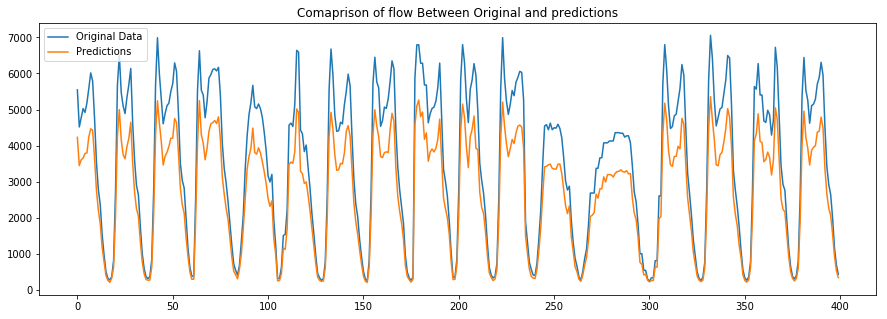

In [67]:
plt.figure(figsize=(15,5))
plt.plot(orig[:400],label="Original Data")
plt.plot(predictions[:400],label="Predictions")
plt.legend(loc='upper left')
plt.title("Comaprison of flow Between Original and predictions")

Text(0.5,1,'Comaprison of flow Between Original and predictions')

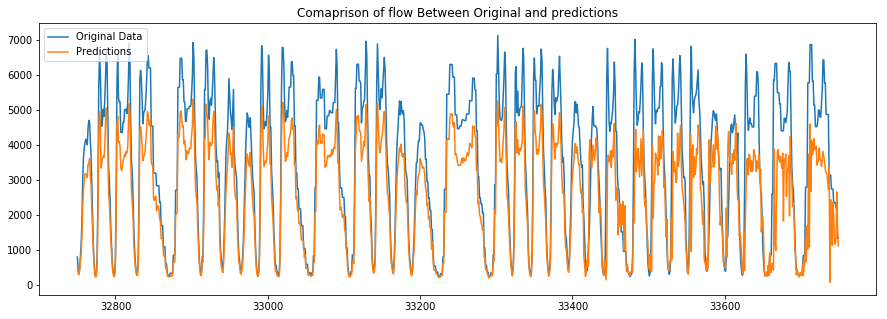

In [68]:
plt.figure(figsize=(15,5))
plt.plot(orig[-1000:],label="Original Data")
plt.plot(predictions[-1000:],label="Predictions")
plt.legend(loc='upper left')
plt.title("Comaprison of flow Between Original and predictions")

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
LRmodel = LinearRegression()

In [71]:
LRmodel.fit(np.array(predictions.tolist()).reshape(-1, 1),np.array(orig.tolist()).reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
import pickle
pickle.dump(LRmodel, open(LRfilename, 'wb'))

In [73]:
# RCLRModel = pickle.load(open(filename, 'rb'))

# Test Data

In [89]:
Test_data = pd.read_csv("DataSets/Test.csv")

In [90]:
Test_data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [91]:
def predict(model,data):
    outputDate = data["date_time"]
    preprocessedData = pd.DataFrame(preProcessingScript(data))
    return postProcessingScript(model.predict(preprocessedData),outputDate)

In [92]:
def postProcessingScript(predictions,index):
    import pandas as pd
    import numpy as np
#     RCLRModel = pickle.load(open('LRModel1564824033.pkl', 'rb'))
#     filteredPredictionsIntList = [int(round(item[0])) for item in LRmodel.predict(predictions)]
    filteredPredictionsIntList = [int(round(item[0])) for item in predictions]
    data = {'date_time': index,'traffic_volume':filteredPredictionsIntList}
    output = pd.DataFrame(data)
    output['traffic_volume'] = np.where(output['traffic_volume']  <= 0 , output['traffic_volume'].rolling(2).median(), output['traffic_volume'])
    return output

In [93]:
predictionDataFrame = predict(model,Test_data)
predictionDataFrame.to_csv(outfilename, index=False)